<a href="https://colab.research.google.com/github/nrohrbach/KeyFiguresElectricalInstallations/blob/main/KeyFiguresElectricalInstallations36kV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kennzahlen Geobasisdatensatz Elektrische Anlagen mit einer Nennspannung von über 36kV

---

Notebook um Kennzahlen des Geobasisdatensatzes "Elektrische Anlagen mit einer Nennspannung von über 36kV abzuleiten.






In [4]:
#pip install geopandas

In [5]:
#pip install datetime

In [6]:
#pip install numpy

In [7]:
import geopandas as gpd
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Neu
pip install owslib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.1/221.1 kB 3.3 MB/s eta 0:00:00


In [17]:
from owslib.wfs import WebFeatureService
from requests import Request

In [51]:
# WFS-Domain (auf PROD schalten)
url = "https://integration.geodienste.ch/db/elektrische_anlagen_ueber_36kv_v1_0_0/deu"

# Initialize
wfs = WebFeatureService(url=url)

# Parameter für Datenfetching (Count 100 entfernen)
paramsLeitung = dict(service='WFS', version="2.0.0", request='GetFeature', typeName='leitung', outputFormat='geojson', count=100, startIndex=0)
paramsStation = dict(service='WFS', version="2.0.0", request='GetFeature', typeName='station_punkt', outputFormat='geojson', count=100, startIndex=0)
paramsMast = dict(service='WFS', version="2.0.0", request='GetFeature', typeName='mast', outputFormat='geojson', count=100, startIndex=0)

# Parse URL mit Parametern
urlleitung = Request('GET', url, params=paramsLeitung).prepare().url
urlstation = Request('GET', url, params=paramsStation).prepare().url
urlmast = Request('GET', url, params=paramsMast).prepare().url

In [39]:
leitung = gpd.read_file(urlleitung)

In [52]:
leitung.rename(columns ={'id':'Leitung_ID',
                         'bezeichnung':'Bezeichnung',
                         'eigentuemer':'Eigentuemer',
                         'eigentum_vollstaendig':'EigentumVollstaendig',
                         'lagegenauigkeit':'Lagegenauigkeit',
                         'stromnetz_typ':'StromnetzTyp',
                         'leitung_typ':'LeitungTyp',
                         'spannung':'Spannung',
                         'betriebsstatus':'Betriebsstatus',
                         'frequenz':'Frequenz'})

,Leitung_ID,Bezeichnung,Eigentuemer,EigentumVollstaendig,eigentum_vollstaendig_de,Lagegenauigkeit,StromnetzTyp,LeitungTyp,Spannung,Betriebsstatus,Frequenz,geometry
0,0000082188,Lodrino - Iragna,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S50kV,inBetrieb,F50Hz,"LINESTRING (2719066.726 1129062.315, 2718981.3..."
1,0000082683,Quartino - Sigirino,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S50kV,inBetrieb,F50Hz,"LINESTRING (2713103.311 1111239.582, 2713088.9..."
2,0000264240,Pollegio - Acquarossa,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S50kV,inBetrieb,F50Hz,"LINESTRING (2718072.166 1137753.881, 2718073.4..."
3,0000303507,Monte Carasso - Iragna,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S150kV,inBetrieb,F50Hz,"LINESTRING (2721644.410 1122496.540, 2721497.8..."
4,0000303508,Monte Carasso - Iragna,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S150kV,inBetrieb,F50Hz,"LINESTRING (2721109.740 1116880.080, 2721138.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0001093059,Pollegio - Acquarossa,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S50kV,inBetrieb,F50Hz,"LINESTRING (2718120.632 1138431.455, 2718128.1..."
96,0001093077,Pollegio - Acquarossa,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S50kV,inBetrieb,F50Hz,"LINESTRING (2718128.125 1138531.738, 2718135.4..."
97,0001093095,Pollegio - Acquarossa,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S50kV,inBetrieb,F50Hz,"LINESTRING (2718135.461 1138631.156, 2718143.0..."
98,0001093118,Pollegio - Acquarossa,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S50kV,inBetrieb,F50Hz,"LINESTRING (2718143.022 1138730.424, 2718150.1..."


In [44]:
#pip install geodatasets
import geodatasets

<Axes: >

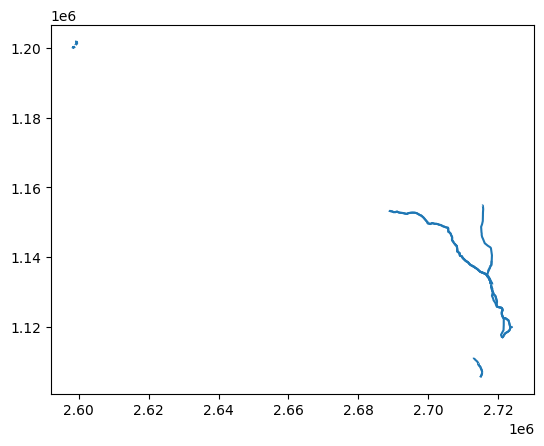

In [46]:
leitung.plot()

In [47]:
leitung.head()

,id,bezeichnung,eigentuemer,eigentum_vollstaendig,eigentum_vollstaendig_de,lagegenauigkeit,stromnetz_typ,leitung_typ,spannung,betriebsstatus,frequenz,geometry
0,0000082188,Lodrino - Iragna,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S50kV,inBetrieb,F50Hz,"LINESTRING (2719066.726 1129062.315, 2718981.3..."
1,0000082683,Quartino - Sigirino,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S50kV,inBetrieb,F50Hz,"LINESTRING (2713103.311 1111239.582, 2713088.9..."
2,0000264240,Pollegio - Acquarossa,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S50kV,inBetrieb,F50Hz,"LINESTRING (2718072.166 1137753.881, 2718073.4..."
3,0000303507,Monte Carasso - Iragna,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S150kV,inBetrieb,F50Hz,"LINESTRING (2721644.410 1122496.540, 2721497.8..."
4,0000303508,Monte Carasso - Iragna,AET,0,Ja,genau,Allgemeinstrom,Freileitung,S150kV,inBetrieb,F50Hz,"LINESTRING (2721109.740 1116880.080, 2721138.3..."


In [14]:
wfs.contents

{'station_flaeche': <owslib.feature.wfs100.ContentMetadata at 0x7edd2273f820>,
 'leitung': <owslib.feature.wfs100.ContentMetadata at 0x7edd2273f6d0>,
 'station_punkt': <owslib.feature.wfs100.ContentMetadata at 0x7edd2273f580>,
 'mast': <owslib.feature.wfs100.ContentMetadata at 0x7edd2273f730>}

In [48]:
url = "https://data.geo.admin.ch/ch.bfe.elektrische-anlagen_ueber_36/gpkg/2056/ElektrischeAnlagenNennspannungUeber36kV_V1.gpkg"
dfLeitung = gpd.read_file(url, driver="GPKG", layer='ElektrischeAnlagenNennspannungUeber36kV_V1_ElektrischeAnlagen_Leitung')
dfStation = gpd.read_file(url, driver="GPKG", layer='ElektrischeAnlagenNennspannungUeber36kV_V1_ElektrischeAnlagen_Station')
dfMast = gpd.read_file(url, driver="GPKG", layer='ElektrischeAnlagenNennspannungUeber36kV_V1_ElektrischeAnlagen_Mast')

In [49]:
dfLeitung.head()

,xtf_id,Leitung_ID,Bezeichnung,Eigentuemer,EigentumVollstaendig,Lagegenauigkeit,StromnetzTyp,LeitungTyp,Spannung,SpannungAndere,Betriebsstatus,Frequenz,geometry
0,iwb_0_44158429,44158429,NaN,IWB,True,ungenau,Allgemeinstrom,Kabelleitung,S50kV,NaN,ausserBetrieb,Gleichstrom,"LINESTRING (2611874.219 1265385.912, 2611864.0..."
1,iwb_0_44158430,44158430,NaN,IWB,True,ungenau,Allgemeinstrom,Kabelleitung,S50kV,NaN,ausserBetrieb,Gleichstrom,"LINESTRING (2611874.219 1265385.912, 2611864.0..."
2,iwb_0_44158431,44158431,NaN,IWB,True,ungenau,Allgemeinstrom,Kabelleitung,S50kV,NaN,ausserBetrieb,Gleichstrom,"LINESTRING (2611874.219 1265385.912, 2611864.0..."
3,iwb_0_44163589,44163589,NaN,IWB,True,ungenau,Allgemeinstrom,Kabelleitung,S50kV,NaN,ausserBetrieb,Gleichstrom,"LINESTRING (2613120.882 1265219.918, 2613121.9..."
4,iwb_0_44163590,44163590,NaN,IWB,True,ungenau,Allgemeinstrom,Kabelleitung,S50kV,NaN,ausserBetrieb,Gleichstrom,"LINESTRING (2613122.385 1265237.170, 2613122.7..."


## Kennzahlen Leitungen

In [ ]:
# Länge der Leitungen berechnen und nach Spannung aufsummieren
dfLeitung["Laenge"] = dfLeitung.length
dfLeitungKPI = dfLeitung.groupby(['StromnetzTyp','Spannung','LeitungTyp'])['Laenge'].sum()
dfLeitungKPI = dfLeitungKPI.to_frame().reset_index()
dfLeitungKPI['Datum'] = datetime.today().strftime("%Y-%m-%d")

In [ ]:
#Speichern
dfLeitungKPI.to_csv("data/Kennzahlen_Leitungen.csv", header=False, index=False, mode='a')

## Kennzahlen Masten

In [ ]:
dfMastKPI = dfMast.groupby(['StromnetzTyp','MastTyp'])['xtf_id'].count().reset_index()
dfMastKPI = dfMastKPI.rename(columns={'xtf_id':'Anzahl'})
dfMastKPI['Datum'] = datetime.today().strftime("%Y-%m-%d")

In [ ]:
#Speichern
dfMastKPI.to_csv("data/Kennzahlen_Masten.csv", header=False, index=False, mode='a')

## Kennzahlen Stationen

In [ ]:
dfStationKPI = dfStation.groupby(['StromnetzTyp','StationTyp'])['xtf_id'].count().reset_index()
dfStationKPI = dfStationKPI.rename(columns={'xtf_id':'Anzahl'})
dfStationKPI['Datum'] = datetime.today().strftime("%Y-%m-%d")

In [ ]:
#Speichern
dfStationKPI.to_csv("data/Kennzahlen_Stationen.csv", header=False, index=False, mode='a')

## Kennzahlen Werke

In [ ]:
# Leitungslänge pro Werk ableiten.
dfWerkeLeitung = dfLeitung.groupby(['Eigentuemer','LeitungTyp'])['Laenge'].sum()
dfWerkeLeitung = dfWerkeLeitung.to_frame().reset_index()
dfWerkeLeitung = pd.pivot(dfWerkeLeitung,index='Eigentuemer',columns='LeitungTyp')
dfWerkeLeitung = dfWerkeLeitung.reset_index()
dfWerkeLeitung.columns = dfWerkeLeitung.columns.droplevel()
dfWerkeLeitung.columns = ['Werk','Freileitung','Kabelleitung']
dfWerkeLeitung = dfWerkeLeitung.fillna(0)
dfWerkeLeitung['LeitungGesamt']= dfWerkeLeitung['Kabelleitung']+dfWerkeLeitung['Freileitung']

In [ ]:
# Anzahl Masten pro Werk ableiten.
dfWerkeMast = dfMast
dfWerkeMast['Werk'] = dfWerkeMast['Eigentuemer']
dfWerkeMast = dfWerkeMast.groupby(['Werk'])['xtf_id'].count().reset_index()
dfWerkeMast = dfWerkeMast.rename(columns={'xtf_id':'AnzahlMasten'})

In [ ]:
# Anzahl Stationen pro Werk ableiten.
dfWerkeStation = dfStation
dfWerkeStation['Werk'] = dfWerkeStation['Eigentuemer']
dfWerkeStation = dfWerkeStation.groupby(['Werk'])['xtf_id'].count().reset_index()
dfWerkeStation = dfWerkeStation.rename(columns={'xtf_id':'AnzahlStationen'})

In [ ]:
# Zusammenführen
dfWerke = pd.merge(dfWerkeLeitung, dfWerkeMast, how="left", on=["Werk"])
dfWerke = pd.merge(dfWerke, dfWerkeStation, how="left", on=["Werk"])
dfWerke = dfWerke.fillna(0)
dfWerke['Datum'] = datetime.today().strftime("%Y-%m-%d")

In [ ]:
#Speichern
dfWerke.to_csv("data/Kennzahlen_Werke.csv", header=False, index=False, mode='a')

### Kennzahlen für Visualisierung in Storymap ableiten

In [ ]:
dfLeitungStorymap = dfLeitungKPI

# Gewünschte Kategorien definieren
Bedingungen = [dfLeitungStorymap['Spannung']=='S380kV',
               dfLeitungStorymap['Spannung']=='S220kV',
               (dfLeitungStorymap['StromnetzTyp']=='Allgemeinstrom') & (dfLeitungStorymap['Spannung'].isin(['S150kV','S132kV','S130kV','S125kV','S110kV'])),
               (dfLeitungStorymap['StromnetzTyp']=='Allgemeinstrom') & (dfLeitungStorymap['Spannung'].isin(['S66kV','S65kV','S60kV','S50kV','S36kV','Andere'])),
               (dfLeitungStorymap['StromnetzTyp']=='Bahnstrom') & (dfLeitungStorymap['Spannung']=='S132kV'),
               (dfLeitungStorymap['StromnetzTyp']=='Bahnstrom') & (dfLeitungStorymap['Spannung'].isin(['S66kV','Andere']))
               ]

Spannungen = ['s380','s220','s150','s66','s132B','s66B']

# Neues Attribut "Kategorie" erstellen welches für alle Objekte die gewünschte Kategorie bestimmt
dfLeitungStorymap['Kategorie'] =  np.select(Bedingungen,Spannungen)

In [ ]:
# Dataframe für Totale Länge vorbereiten
dfTotal = dfLeitungStorymap.groupby('Kategorie').sum(numeric_only=True).reset_index()
dfTotal['Kategorie'] = 'Total_'+ dfTotal['Kategorie']
dfTotal = dfTotal.transpose()
dfTotal.columns = dfTotal.iloc[0]
dfTotal = dfTotal[1:]
dfTotal['Datum'] = datetime.today().strftime("%Y-%m-%d")

In [ ]:
# Dataframe für Länge von Kabel vorbereiten
dfKabel = dfLeitungStorymap.loc[dfLeitungStorymap['LeitungTyp']=='Kabelleitung'].groupby('Kategorie').sum(numeric_only=True).reset_index()
dfKabel['Kategorie'] = 'Kabel_'+ dfKabel['Kategorie']
dfKabel = dfKabel.transpose()
dfKabel.columns = dfKabel.iloc[0]
dfKabel = dfKabel[1:]
dfKabel['Datum'] = datetime.today().strftime("%Y-%m-%d")

In [ ]:
# Zusammenführen
dfStorymap = pd.merge(dfTotal, dfKabel, how='left', on=["Datum"])

In [ ]:
#Temporäre Platzhalter für die Bahnstromkategorien erstellen. kann später gelöscht werden!
dfStorymap['Total_s132B'] = 1
dfStorymap['Kabel_s132B'] = 1
dfStorymap['Total_s66B'] = 1
dfStorymap['Kabel_s66B'] = 1

In [ ]:
#Speichern
dfStorymap.to_csv("data/Kennzahlen_Storymap.csv", header=False, index=False, mode='a')

### Visualisierungen Werke

In [ ]:
#Daten für Visualisierung laden
df = pd.read_csv("data/Kennzahlen_Werke.csv", parse_dates=['Datum'])
dfVis = df
dfVis['Freileitung'] = dfVis['Freileitung']/1000
dfVis['Kabelleitung'] = dfVis['Kabelleitung']/1000
dfVis['LeitungGesamt'] = dfVis['LeitungGesamt']/1000
dfVis['Freileitung'] = dfVis['Freileitung'].round(0)
dfVis['Kabelleitung'] = dfVis['Kabelleitung'].round(0)
dfVis['LeitungGesamt'] = dfVis['LeitungGesamt'].round(0)
dfVis = df.loc[df['Datum'] == datetime.today().strftime("%Y-%m-%d")]

#### Anzahl Masten pro Werkbetreiber

In [ ]:
#Barchart Anzahl Masten
dfVis = dfVis.sort_values('AnzahlMasten',ascending=False)
fig, ax = plt.subplots()
ax.bar(dfVis['Werk'], dfVis['AnzahlMasten'])
ax.set_title('Anzahl Masten')
plt.xticks(rotation = 90)
plt.ylabel("Anzahl Masten")
ax.bar_label(ax.containers[0], label_type='edge')
plt.savefig('plots/AnzahlMasten.png',bbox_inches='tight')
plt.close()

#### Anzahl Stationen pro Werkbetreiber

In [ ]:
#Barchart Anzahl Stationen
dfVis = dfVis.sort_values('AnzahlStationen',ascending=False)
fig, ax = plt.subplots()
ax.bar(dfVis['Werk'], dfVis['AnzahlStationen'])
ax.set_title('Anzahl Stationen')
plt.xticks(rotation = 90)
plt.ylabel("Anzahl Stationen")
ax.bar_label(ax.containers[0], label_type='edge')
plt.savefig('plots/AnzahlStationen.png',bbox_inches='tight')
plt.close()

#### Länge der Leitungen pro Werkbetreiber

In [ ]:
#Barchart Länge Leitungen
dfVis = dfVis.sort_values('LeitungGesamt',ascending=False)

#bar chart properties
x = np.arange(len(dfVis['Werk']))
width = 0.3

#draw grouped bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, dfVis['Freileitung'], width, label='Freileitung')
bar2 = ax.bar(x + width/2, dfVis['Kabelleitung'], width, label='Kabelleitung')

#ax.set_xlabel('Year')
ax.set_ylabel('Länge (km)')
ax.set_title('Länge der Leitungen')
ax.set_xticks(x, dfVis['Werk'])
ax.legend()

#setting bar labels
ax.bar_label(bar1)
ax.bar_label(bar2)
plt.xticks(rotation = 90)

plt.savefig('plots/LaengeLeitungen.png',bbox_inches='tight')
plt.close()

### Visualisierungen Masten

In [ ]:
#Zeitliche Entwicklung Anzahl Masten
dfAnzahlMasten = pd.read_csv("data/Kennzahlen_Masten.csv", parse_dates=['Datum'])
dfAnzahlMastenEntwicklung = dfAnzahlMasten.pivot(index="Datum", columns=["MastTyp","StromnetzTyp"],values="Anzahl")
dfAnzahlMastenEntwicklung.plot(figsize=(15,10))
plt.legend(loc='lower left')
plt.title("Übersicht Anzahl Masten")
plt.savefig('plots/UebersichtAnzahlMasten.png')
plt.close()

### Visualisierung Stationen

In [ ]:
#Zeitliche Entwicklung Anzahl Stationen
dfAnzahlStationen = pd.read_csv("data/Kennzahlen_Stationen.csv", parse_dates=['Datum'])
dfAnzahlStationen = dfAnzahlStationen.pivot(index="Datum", columns=["StationTyp","StromnetzTyp"],values="Anzahl")
dfAnzahlStationen.plot(figsize=(15,10))
plt.legend(loc='lower left')
plt.title("Übersicht Anzahl Stationen")
plt.savefig('plots/UebersichtAnzahlStationen.png')
plt.close()

### Visualisierung Leitungen


In [ ]:
#Zeitliche Entwicklung Länge der Leitungen - Daten vorbereiten
dfLaengeLeitungen = pd.read_csv("data/Kennzahlen_Leitungen.csv", parse_dates=['Datum'])
dfLaengeLeitungen['Laenge'] = dfLaengeLeitungen['Laenge']/1000
dfLaengeLeitungen['Laenge'] = dfLaengeLeitungen['Laenge'].round(0)

#### Leitungslänge pro Leitungstyp - zeitliche Entwicklung

In [ ]:
#Zeitliche Entwicklung Länge der Leitungen - Leitungstyp
dfLaengeLeitungTyp = dfLaengeLeitungen.groupby(['LeitungTyp','Datum'])['Laenge'].sum().reset_index()
dfLaengeLeitungTyp = dfLaengeLeitungTyp.pivot(index="Datum", columns=["LeitungTyp"],values="Laenge")
dfLaengeLeitungTyp.plot(figsize=(15,10))
plt.legend(loc='lower left')
plt.title("Länge der Leitungen (km) - Leitungstyp")
plt.savefig('plots/LaengeLeitungen_Typ.png')
plt.close()

#### Leitungslänge pro Spannungsebene - zeitliche Entwicklung

In [ ]:
#Zeitliche Entwicklung Länge der Leitungen - Spannung
dfLaengeLeitungTyp = dfLaengeLeitungen.groupby(['Spannung','Datum'])['Laenge'].sum().reset_index()
dfLaengeLeitungTyp = dfLaengeLeitungTyp.pivot(index="Datum", columns=["Spannung"],values="Laenge")
dfLaengeLeitungTyp.plot(figsize=(15,10))
plt.legend(loc='lower left')
plt.title("Länge der Leitungen (km) - Spannung")
plt.savefig('plots/LaengeLeitungen_Spannung.png')
plt.close()

#### Leitungslänge pro Stromnetztyp - zeitliche Entwicklung

In [ ]:
#Zeitliche Entwicklung Länge der Leitungen - StromnetzTyp
dfLaengeLeitungTyp = dfLaengeLeitungen.groupby(['StromnetzTyp','Datum'])['Laenge'].sum().reset_index()
dfLaengeLeitungTyp = dfLaengeLeitungTyp.pivot(index="Datum", columns=["StromnetzTyp"],values="Laenge")
dfLaengeLeitungTyp.plot(figsize=(15,10))
plt.legend(loc='lower left')
plt.title("Länge der Leitungen (km) - StromnetzTyp")
plt.savefig('plots/LaengeLeitungen_StromnetzTyp.png')
plt.close()

#### Leitungslänge nach Spannung

In [ ]:
#Barchart Länge Leitungen nach Spannung

#Daten vorbereiten
dfLeitungenBarChart = dfLaengeLeitungen.pivot_table(index='Spannung',columns=['LeitungTyp'],values='Laenge', aggfunc='sum').reset_index()
dfLeitungenBarChart = dfLeitungenBarChart.fillna(0)
dfLeitungenBarChart['Spannung'] = dfLeitungenBarChart['Spannung'].replace({'S':''},regex=True)
dfLeitungenBarChart = dfLeitungenBarChart.sort_values('Freileitung',ascending=False)

#bar chart properties
x = np.arange(len(dfLeitungenBarChart['Spannung']))
width = 0.3

#draw grouped bar chart
fig, ax = plt.subplots(figsize=(15,10))
bar1 = ax.bar(x - width/2, dfLeitungenBarChart['Freileitung'], width, label='Freileitung')
bar2 = ax.bar(x + width/2, dfLeitungenBarChart['Kabelleitung'], width, label='Kabelleitung')

#ax.set_xlabel('Year')
ax.set_ylabel('Länge (km)')
ax.set_title('Länge der Leitungen')
ax.set_xticks(x, dfLeitungenBarChart['Spannung'])

#setting bar labels
ax.bar_label(bar1)
ax.bar_label(bar2)
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.savefig('plots/LaengeLeitungen_Spannung_Uebersicht.png',bbox_inches='tight')
plt.close()

#### Masttyp Übersicht

In [ ]:
#Daten vorbereiten
dfAnzahlMastenUebersicht = dfAnzahlMasten
dfAnzahlMastenUebersicht = dfAnzahlMastenUebersicht.loc[dfAnzahlMastenUebersicht['Datum'] == datetime.today().strftime("%Y-%m-%d")]

#Barchart
x = np.arange(len(dfAnzahlMastenUebersicht['MastTyp']))
fig, ax = plt.subplots(figsize=(15,10))
bar1 = ax.bar(x, dfAnzahlMastenUebersicht['Anzahl'], label='MastTyp')
ax.set_ylabel('Anzahl Masten')
ax.set_title('Anzahl Masten')
ax.set_xticks(x, dfAnzahlMastenUebersicht['MastTyp'])
ax.bar_label(bar1)
plt.savefig('plots/AnzahlMasten_Uebersicht.png',bbox_inches='tight')
plt.close()